## Glassdoor Data Science Job Listings
This dataset comprises information extracted from 1,500 job postings related to data science from Glassdoor.com. The data encompasses essential details about each job listing, facilitating comprehensive analysis and insights into the data science job market.
link: https://www.kaggle.com/datasets/rrkcoder/glassdoor-data-science-job-listings

In [4]:
# Import libraries

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [5]:
# Import csv file

df = pd.read_csv("glassdoor_data_jobs.csv")

## Exploring the data

In [6]:
df.head(3)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
0,Data Scientist,-1,Job Overview\nA Data Scientist at ExploreLearn...,4.2,Cambium Learning Group\n4.3,Remote,1001 to 5000 Employees,2004,Company - Private,Primary & Secondary Schools,Education,$500 million to $1 billion (USD)
1,2024 University Graduate - Data Scientist,Employer Provided Salary:$83K - $153K,Our Company\n\nChanging the world through digi...,4.4,Adobe\n4.4,"San Jose, CA",10000+ Employees,1982,Company - Public,Computer Hardware Development,Information Technology,$5 to $10 billion (USD)
2,Data Scientist – Entry Level 2024,Employer Provided Salary:$71K - $133K,Introduction\nRanked by Forbes as one of the w...,3.9,IBM\n3.9,"Atlanta, GA",10000+ Employees,1911,Company - Public,Information Technology Support Services,Information Technology,$10+ billion (USD)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Job Title          1500 non-null   object 
 1   Salary Estimate    1500 non-null   object 
 2   Job Description    1500 non-null   object 
 3   Rating             1500 non-null   float64
 4   Company Name       1500 non-null   object 
 5   Location           1500 non-null   object 
 6   Size               1500 non-null   object 
 7   Founded            1500 non-null   int64  
 8   Type of ownership  1500 non-null   object 
 9   Industry           1500 non-null   object 
 10  Sector             1500 non-null   object 
 11  Revenue            1500 non-null   object 
dtypes: float64(1), int64(1), object(10)
memory usage: 140.8+ KB


In [8]:
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataset.")
print(f"The name of the columns are:\n{df.columns}")

There are 1500 rows and 12 columns in this dataset.
The name of the columns are:
Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue'],
      dtype='object')


In [9]:
#Checking for duplicates
print(f"There are {df.duplicated().sum()} duplicated rows in the dataset.")

There are 680 duplicated rows in the dataset.


In [10]:
#Checking for null data
print(df.isnull().sum())

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
dtype: int64


In [11]:
df.describe()

,Rating,Founded
count,1500.000000,1500.000000
mean,3.026533,1347.163333
std,1.956785,913.909381
min,-1.000000,-1.000000
25%,3.000000,-1.000000
50%,3.800000,1944.000000
75%,4.100000,2001.000000
max,5.000000,2022.000000


## Processing data

In [12]:
# Creating a copy to clean and manipulate the data without changing the original dataset 

def processing_data(df):

    # Deleting duplicates
    df.drop_duplicates(inplace = True)

    # Deleting column Job Description
    df.drop(columns=['Job Description'], inplace=True)

    # Eliminating Rating and salary lower than 0
    df.loc[df["Rating"] == -1, "Rating"] = None
    df.loc[df["Salary Estimate"] == "-1", "Salary Estimate"] = None
    df.loc[df["Industry"] == "-1", "Industry"] = None
    df.loc[df["Sector"] == "-1", "Sector"] = None
    df.loc[df["Founded"] == "-1", "Founded"] = None

    # Eliminating company size lower than 0 or unknown
    df.loc[df["Size"] == "-1", "Size"] = None
    df.loc[df["Size"] == "Unknown", "Size"] = None

    #Converting years to int
    df["Founded"] = df["Founded"].astype(int)

    # Eliminating null
    df.dropna(inplace=True)
    
    # Sorting by rating in descending order
    df.sort_values(by = "Rating", ascending = False, inplace = True)

df_processed = df.copy()
processing_data(df_processed)
df_processed

,Job Title,Salary Estimate,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,Sector,Revenue
604,Data Scientist,$110K - $158K (Glassdoor est.),5.0,BICP\n5.0,"San Francisco, CA",1 to 50 Employees,2009,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD)
405,Data Scientist - Senior,$100K - $136K (Glassdoor est.),5.0,The Swift Group,"Chantilly, VA",201 to 500 Employees,2019,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable
140,Data Scientist,Employer Provided Salary:$150K - $175K,5.0,Octaura\n5.0,"New York, NY",1 to 50 Employees,2022,Company - Private,Financial Transaction Processing,Financial Services,Unknown / Non-Applicable
483,Machine Learning / Data Scientist,$115K - $160K (Glassdoor est.),5.0,Docugami\n5.0,"Kirkland, WA",1 to 50 Employees,-1,Company - Private,Enterprise Software & Network Solutions,Information Technology,Unknown / Non-Applicable
116,Data Scientist,Employer Provided Salary:$45.00 - $55.00 Per Hour,5.0,APPIC Solutions LLC\n5.0,"Foster City, CA",1 to 50 Employees,2017,Company - Private,Software Development,Information Technology,$1 to $5 million (USD)
...,...,...,...,...,...,...,...,...,...,...,...
171,Scientist I,Employer Provided Salary:$85K - $95K,2.5,GeneDx\n2.5,"Gaithersburg, MD",201 to 500 Employees,-1,Company - Public,Biotech & Pharmaceuticals,Pharmaceutical & Biotechnology,$5 to $25 million (USD)
693,Data Scientist,Employer Provided Salary:$70K - $110K,2.5,Federal Reserve Bank of St. Louis\n2.5,"Saint Louis, MO",1001 to 5000 Employees,1913,Self-employed,National Agencies,Government & Public Administration,Unknown / Non-Applicable
523,Sr Data Scientist,Employer Provided Salary:$110K,2.4,"VIZIO, Inc.\n2.4","Denver, CO",501 to 1000 Employees,2002,Company - Public,Computer Hardware Development,Information Technology,$1 to $5 billion (USD)
645,Senior Data Scientist,Employer Provided Salary:$60.00 Per Hour,2.3,Talent Group\n2.3,"Dallas, TX",1 to 50 Employees,-1,Company - Public,Broadcast Media,Media & Communication,Less than $1 million (USD)


In [13]:
df_processed.describe()

,Rating,Founded
count,586.000000,586.000000
mean,3.874573,1836.694539
std,0.471316,487.567551
min,1.000000,-1.000000
25%,3.600000,1916.000000
50%,3.900000,1982.000000
75%,4.200000,2006.000000
max,5.000000,2022.000000


## Analysing

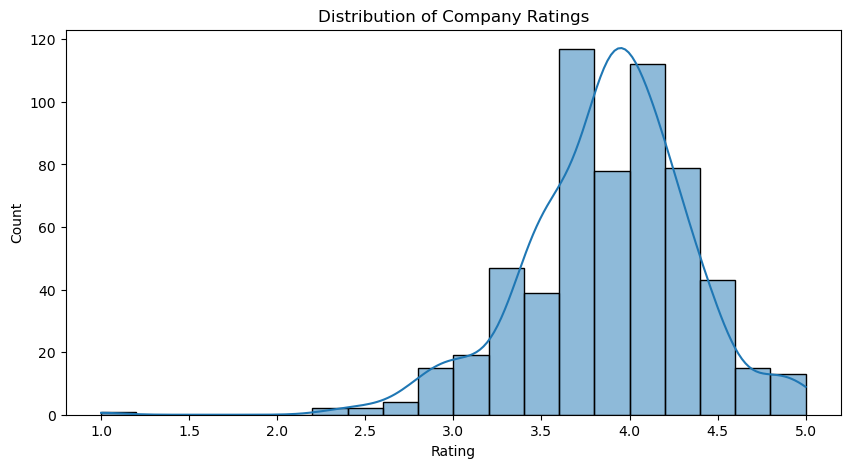

In [14]:
# Plotting helped identifying overlying data to be cleaned up.
plt.figure(figsize=(10, 5))
sns.histplot(data=df_processed, x="Rating", bins=20, kde=True)
plt.title("Distribution of Company Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

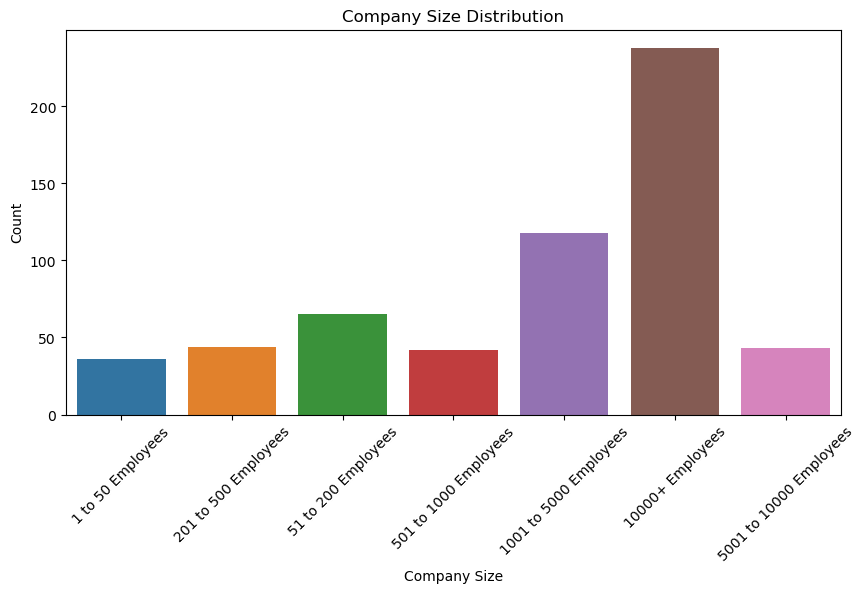

In [15]:
# Plotting helped identifying overlying data to be cleaned up.

plt.figure(figsize=(10, 5))
sns.countplot(data=df_processed, x='Size')
plt.title('Company Size Distribution')
plt.xlabel('Company Size')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## Conclusions

Várias informações podem ser extraídas do dataset, porém, exige uma melhor limpeza, organização e padronização dos dados. 
No momento, podemos observar que existe uma concentração muito grande de empresas com rating entre 3.5 e 4.5. 
Também observamos que a grande maioria das empresas que oferecem vagas de ciência de dados tem mais de 10000 integrantes.

In [16]:
df.to_csv('data_jobs_cleaned.csv')